In [260]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from  sklearn.model_selection import KFold, train_test_split

In [261]:
# import data

data = pd.read_csv('LumositySample_user92098.csv')

In [262]:
def expmodel(params, x):
    # A basic exponential model
    c, a, u = params
    '''
    c = params[0]
    a = params[1]
    u = params[2]
    '''

    predy = a - (a - u) * np.exp(-c * x)
    return predy

def powermodel(params, x):
    # A basic power model
    c, a, u = params
    predy = a - (a - u) * x ** -c
    return predy

def AFDmodel(u, b, h, c, s, d, x):
    n = len(x) # We need the total number of gameplays
    predy = np.zeros(n)
    for i in range(n):
        strength = 0
        for j in range(i-1):
            if s[i] == s[j]:
                t = (i-j)
            else:
                t = (i-j)+(d[i]-d[j])*h
            strength = strength + (t**(-c))
        predy[i] = u + b*np.log(strength+1)
    return predy

def calcmse(params, x, y, model, session=None, day=None):
    '''make sure params list mathches the required parameters for the model
    ex: exp_model has c, a, u, t
    ex: AFD_model has u, b, h, c, s, d, g'''
    # predicted scores
    if model == 'AFDmodel':
        predy = model(params, session, day, x)
    else:
        predy = model(params, x)
    mse = np.mean((predy - y)**2)
    return mse

def cross_validation(data, params, model):
    kf = KFold(n_splits=10, shuffle=True)
    x=data.columns[0]
    y=data.columns[1]
    mse = []
    for train_index, validation_index in kf.split(data):
        train, validation = data.iloc[train_index,:], data.iloc[validation_index]
        result = minimize(calcmse, params, args=(train[x], train[y], model), bounds=[(0, None), (0, None), (0, None)])
        p = result.x
        mse_v = calcmse(p, validation[x], validation[y], model)
        mse.append(mse_v)
    avg_mse = np.mean(mse)
    return avg_mse, p

'''
def MySuperModel(data, p0):
    # Some combination of 2 or more models
    # find the best model by finding lowest MSE
    df = pd.read_csv(data)
    all_mse = {}
    all_mse['exponential model'] = cross_validation(data, p0, expmodel)
    all_mse['power model'] = cross_validation(data, p0, powermodel)
    all_mse['AFD model'] = cross_validation(data, p0, AFDmodel)
'''

"\ndef MySuperModel(data, p0):\n    # Some combination of 2 or more models\n    # find the best model by finding lowest MSE\n    df = pd.read_csv(data)\n    all_mse = {}\n    all_mse['exponential model'] = cross_validation(data, p0, expmodel)\n    all_mse['power model'] = cross_validation(data, p0, powermodel)\n    all_mse['AFD model'] = cross_validation(data, p0, AFDmodel)\n"

Testing Model !

In [263]:
# plan

# split data between test and train
# start with the first model
# create starting params
# cross validate with model
# output: MSE 
# graph data to see if it lines up okay

# repeat with other models

In [264]:
# split training and test

x = data.gameplay
y = data.score
s = data.session        # for AFD
d = data.dayselapsed    # for AFD

In [265]:
# starting parameter values for exponential model and power model
p0 = np.zeros(3)
p0[0] = 0.5
p0[1] = 100
p0[2] = 50

In [266]:
exp = cross_validation(data, p0, expmodel)
parameter_exp = exp[1]
y_exp = expmodel(parameter_exp,x)

In [267]:
pwr = cross_validation(data, p0, powermodel)
parameter_pwr = pwr[1]
y_pwr = powermodel(parameter_pwr,x)

In [268]:
print('power model MSE:',pwr[0],'\nexponential model MSE:',exp[0])

power model MSE: 14.814880231414168 
exponential model MSE: 7.906160928319319


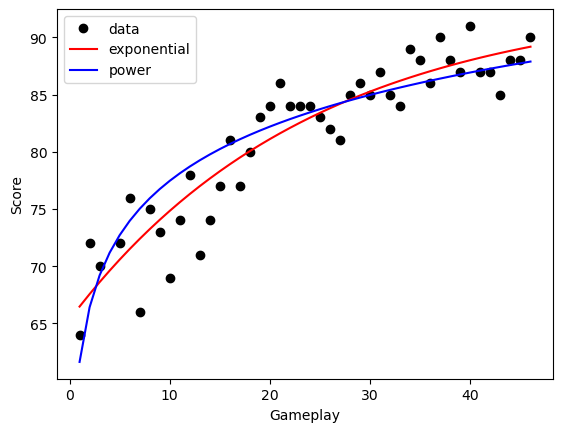

In [269]:
labels = ['data','exponential','power']

plt.plot(x, y, 'ko')
plt.plot(x,y_exp,'r-')
plt.plot(x,y_pwr,'b-')
plt.legend(labels)
plt.xlabel('Gameplay')
plt.ylabel('Score')
plt.show()

In [270]:
# for AFD
# params = u, b, h, c, s,  x
# calcmse(params,x,y)

In [271]:

def AFDmodel(params, s, d, x):
    u, b, h, c = params
    
    n = len(x) # We need the total number of gameplays
    predy = np.zeros(n)
    for i in range(n):
        strength = 0
        for j in range(i-1):
            if s[i] == s[j]:
                t = (i-j)
            else:
                t = (i-j)+(d[i]-d[j])*h
            strength = strength + (t**(-c))
        predy[i] = u + b*np.log(strength+1)
    return predy


In [272]:
type(s)


pandas.core.series.Series

In [273]:
#s = data.session
#d = data.dayselapsed


p0 = np.zeros(4)

p0[0] = 30 #u
p0[1] =  1 #b
p0[2] = 10 #h
p0[3] = 0.2 #c
# p0[4] = [s]
# p0[5] = [d]



In [274]:

def calcmse(params, x, y, model, session, day):
    '''make sure params list mathches the required parameters for the model
    ex: exp_model has c, a, u, t
    ex: AFD_model has u, b, h, c, s, d, g'''
    # predicted scores
    if model == AFDmodel:
        predy = model(params, session, day, x)
    else:
        predy = model(params, x)
    mse = np.mean((predy - y)**2)
    return mse

def cross_validation(data, params, model,session,day):
    kf = KFold(n_splits=10, shuffle=True)
    x=data.columns[0]
    y=data.columns[1]
    mse = []

    if model == AFDmodel:
        s = session
        d = day
    else:
        s = None
        d = None

    for train_index, validation_index in kf.split(data):
        train, validation = data.iloc[train_index,:], data.iloc[validation_index]
        result = minimize(calcmse, params, args=(train[x], train[y], model,s,d))
        p = result.x
        mse_v = calcmse(p, validation[x], validation[y], model, s, d)
        mse.append(mse_v)
    avg_mse = np.mean(mse)
    return avg_mse, p


In [275]:
s = data.session
d = data.dayselapsed

In [276]:
afd = cross_validation(data, p0, AFDmodel,s,d)
parameter_afd = afd[1]
y_afd = AFDmodel(parameter_afd,s,d,x)

/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered in scalar power
  strength = strength + (t**(-c))
/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered in scalar power
  strength = strength + (t**(-c))
/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered in scalar power
  strength = strength + (t**(-c))
/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered in scalar power
  strength = strength + (t**(-c))
/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered in scalar power
  strength = strength + (t**(-c))
/var/folders/01/xmc5z68n57j3mztcxlw9__x00000gn/T/ipykernel_55798/4238684628.py:13: RuntimeWarning: invalid value encountered 

In [277]:
afd[0]

158.40430639839354

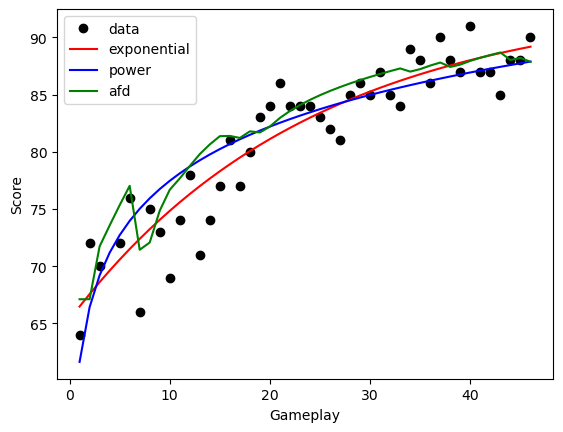

In [278]:
labels = ['data','exponential','power','afd']

plt.plot(x, y, 'ko')
plt.plot(x,y_exp,'r-')
plt.plot(x,y_pwr,'b-')
plt.plot(x,y_afd,'g-')
plt.legend(labels)
plt.xlabel('Gameplay')
plt.ylabel('Score')
plt.show()

In [279]:
print(y_afd)

[67.1154887  67.1154887  71.73410421 73.56238925 75.33328249 77.02671183
 71.43672796 72.0735068  74.85515515 76.683266   77.67639013 78.75744473
 79.80299839 80.64843776 81.36656031 81.38523265 81.21057808 81.78865038
 81.6898878  82.21266737 82.96391154 83.5702551  84.08858921 84.54266443
 84.94934964 85.31907599 85.65894147 85.97408936 86.26810221 86.54431502
 86.80486882 87.0516018  87.28600707 87.00825345 87.22762329 87.53667102
 87.80023707 87.41445989 87.62405693 87.94757038 88.21908135 88.45941159
 88.67804502 88.02180274 88.20439017 87.86301636]
